In [ ]:
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd
import openpyxl
import csv
import matplotlib
import scipy.stats as sp
import xgboost as xgb
import pickle
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scrublet as scr
import seaborn as sns

In [15]:
N_SCsg_Gabrr2_Gaba = sc.read_h5ad('F:/single cell data/SC/N_SC_SCsg Gabrr2 Gaba.h5ad')
N_SCsg_Pde5a_Glut = sc.read_h5ad('F:/single cell data/SC/N_SC_SCsg Pde5a Glut.h5ad')
N_SC_PAG_Gaba_1 = sc.read_h5ad('F:/single cell data/SC/N_SC_SC-PAG Lef1 Emx2 Gaba.h5ad')
N_SC_PAG_Gaba_2 = sc.read_h5ad('F:/single cell data/SC/N_SC_SCm-PAG Cdh23 Gaba.h5ad')
N_SC_PAG_Glut = sc.read_h5ad('F:/single cell data/SC/N_SC_PAG-SC Neurod2 Meis2 Glut.h5ad')
N_SCig_Glut_1 = sc.read_h5ad('F:/single cell data/SC/N_SC_SCig Foxb1 Glut.h5ad')
N_SCig_Glut_2 = sc.read_h5ad('F:/single cell data/SC/N_SC_SCig Tfap2b Chrnb3 Glut.h5ad')
N_SCiw_Glut = sc.read_h5ad('F:/single cell data/SC/N_SC_SCiw Pitx2 Glut.h5ad')
N_SCs_Gaba_1 = sc.read_h5ad('F:/single cell data/SC/N_SC_SCs Dmbx1 Gaba.h5ad')
N_SCs_Gaba_2 = sc.read_h5ad('F:/single cell data/SC/N_SC_SCs Pax7 Nfia Gaba.h5ad')
N_SCs_Gaba_3 = sc.read_h5ad('F:/single cell data/SC/N_SC_SCs Lef1 Gli3 Gaba.h5ad')
N_SC_Gaba_1 = sc.read_h5ad('F:/single cell data/SC/N_SC_SC Lef1 Otx2 Gaba.h5ad')
N_SC_Gaba_2 = sc.read_h5ad('F:/single cell data/SC/N_SC_SC Otx2 Gcnt4 Gaba.h5ad')
N_SC_Gaba_3 = sc.read_h5ad('F:/single cell data/SC/N_SC_SC Tnnt1 Gli3 Gaba.h5ad')
N_SC_Glut = sc.read_h5ad('F:/single cell data/SC/N_SC_SC Bnc2 Glut.h5ad')
N_SCop_Sln_Glut = sc.read_h5ad('F:/single cell data/SC/N_SC_SCop Sln Glut.h5ad')
N_Oligo = sc.read_h5ad('F:/single cell data/SC/N_SC_Oligo.h5ad')
N_Astro = sc.read_h5ad('F:/single cell data/SC/N_SC_Astro.h5ad')
N_OPC = sc.read_h5ad('F:/single cell data/SC/N_SC_OPC.h5ad')
N_Microglia = sc.read_h5ad('F:/single cell data/SC/N_SC_Microglia.h5ad')
N_VLMC =sc.read_h5ad('F:/single cell data/SC/N_SC_VLMC.h5ad')
N_SC_Glut =sc.AnnData.concatenate(N_SCsg_Pde5a_Glut,N_SC_PAG_Glut,N_SCig_Glut_1,N_SCig_Glut_2,N_SCiw_Glut,N_SC_Glut,N_SCop_Sln_Glut)
N_SC_Gaba =sc.AnnData.concatenate(N_SCsg_Gabrr2_Gaba, N_SC_PAG_Gaba_1,N_SC_PAG_Gaba_2,N_SCs_Gaba_1,N_SCs_Gaba_2,N_SCs_Gaba_3,N_SC_Gaba_1,N_SC_Gaba_2,N_SC_Gaba_3)
N_SC_Non =sc.AnnData.concatenate(N_Oligo,N_Astro,N_OPC,N_Microglia,N_VLMC)
N_SC = sc.AnnData.concatenate(N_SC_Glut,N_SC_Gaba,N_SC_Non,batch_categories=['Glut','Gaba','Non Neuron'],batch_key='Class')
N_SC.write_h5ad('F:/single cell data/SC/N_SC_Class.h5ad')
N_SC_Glut.write_h5ad('F:/single cell data/SC/N_SC_Glut_cluster_use.h5ad')
N_SC_Gaba.write_h5ad('F:/single cell data/SC/N_SC_Gaba_cluster_use.h5ad')
N_SC_Non.write_h5ad('F:/single cell data/SC/N_SC_Non_cluster_use.h5ad')

E:\Python\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
E:\Python\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
E:\Python\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
E:\Python\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnD

In [16]:
D_SCsg_Gabrr2_Gaba = sc.read_h5ad('F:/single cell data/SC/D_SC_SCsg Gabrr2 Gaba.h5ad')
D_SCsg_Pde5a_Glut = sc.read_h5ad('F:/single cell data/SC/D_SC_SCsg Pde5a Glut.h5ad')
D_SC_PAG_Gaba_1 = sc.read_h5ad('F:/single cell data/SC/D_SC_SC-PAG Lef1 Emx2 Gaba.h5ad')
D_SC_PAG_Gaba_2 = sc.read_h5ad('F:/single cell data/SC/D_SC_SCm-PAG Cdh23 Gaba.h5ad')
D_SC_PAG_Glut = sc.read_h5ad('F:/single cell data/SC/D_SC_PAG-SC Neurod2 Meis2 Glut.h5ad')
D_SCig_Glut_1 = sc.read_h5ad('F:/single cell data/SC/D_SC_SCig Foxb1 Glut.h5ad')
D_SCig_Glut_2 = sc.read_h5ad('F:/single cell data/SC/D_SC_SCig Tfap2b Chrnb3 Glut.h5ad')
D_SCiw_Glut = sc.read_h5ad('F:/single cell data/SC/D_SC_SCiw Pitx2 Glut.h5ad')
D_SCs_Gaba_1 = sc.read_h5ad('F:/single cell data/SC/D_SC_SCs Dmbx1 Gaba.h5ad')
D_SCs_Gaba_2 = sc.read_h5ad('F:/single cell data/SC/D_SC_SCs Pax7 Nfia Gaba.h5ad')
D_SCs_Gaba_3 = sc.read_h5ad('F:/single cell data/SC/D_SC_SCs Lef1 Gli3 Gaba.h5ad')
D_SC_Gaba_1 = sc.read_h5ad('F:/single cell data/SC/D_SC_SC Lef1 Otx2 Gaba.h5ad')
D_SC_Gaba_2 = sc.read_h5ad('F:/single cell data/SC/D_SC_SC Otx2 Gcnt4 Gaba.h5ad')
D_SC_Gaba_3 = sc.read_h5ad('F:/single cell data/SC/D_SC_SC Tnnt1 Gli3 Gaba.h5ad')
D_SC_Glut = sc.read_h5ad('F:/single cell data/SC/D_SC_SC Bnc2 Glut.h5ad')
D_SCop_Sln_Glut = sc.read_h5ad('F:/single cell data/SC/D_SC_SCop Sln Glut.h5ad')
D_Oligo = sc.read_h5ad('F:/single cell data/SC/D_SC_Oligo.h5ad')
D_Astro = sc.read_h5ad('F:/single cell data/SC/D_SC_Astro.h5ad')
D_OPC = sc.read_h5ad('F:/single cell data/SC/D_SC_OPC.h5ad')
D_Microglia = sc.read_h5ad('F:/single cell data/SC/D_SC_Microglia.h5ad')
D_VLMC =sc.read_h5ad('F:/single cell data/SC/D_SC_VLMC.h5ad')
D_SC_Glut =sc.AnnData.concatenate(D_SCsg_Pde5a_Glut,D_SC_PAG_Glut,D_SCig_Glut_1,D_SCig_Glut_2,D_SCiw_Glut,D_SC_Glut,D_SCop_Sln_Glut)
D_SC_Gaba =sc.AnnData.concatenate(D_SCsg_Gabrr2_Gaba, D_SC_PAG_Gaba_1,D_SC_PAG_Gaba_2,D_SCs_Gaba_1,D_SCs_Gaba_2,D_SCs_Gaba_3,D_SC_Gaba_1,D_SC_Gaba_2,D_SC_Gaba_3)
D_SC_Non =sc.AnnData.concatenate(D_Oligo,D_Astro,D_OPC,D_Microglia,D_VLMC)
D_SC = sc.AnnData.concatenate(D_SC_Glut,D_SC_Gaba,D_SC_Non,batch_categories=['Glut','Gaba','Non Neuron'],batch_key='Class')
D_SC.write_h5ad('F:/single cell data/SC/D_SC_Class.h5ad')
D_SC_Glut.write_h5ad('F:/single cell data/SC/D_SC_Glut_cluster_use.h5ad')
D_SC_Gaba.write_h5ad('F:/single cell data/SC/D_SC_Gaba_cluster_use.h5ad')
D_SC_Non.write_h5ad('F:/single cell data/SC/D_SC_Non_cluster_use.h5ad')

E:\Python\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
E:\Python\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
E:\Python\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
E:\Python\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnD

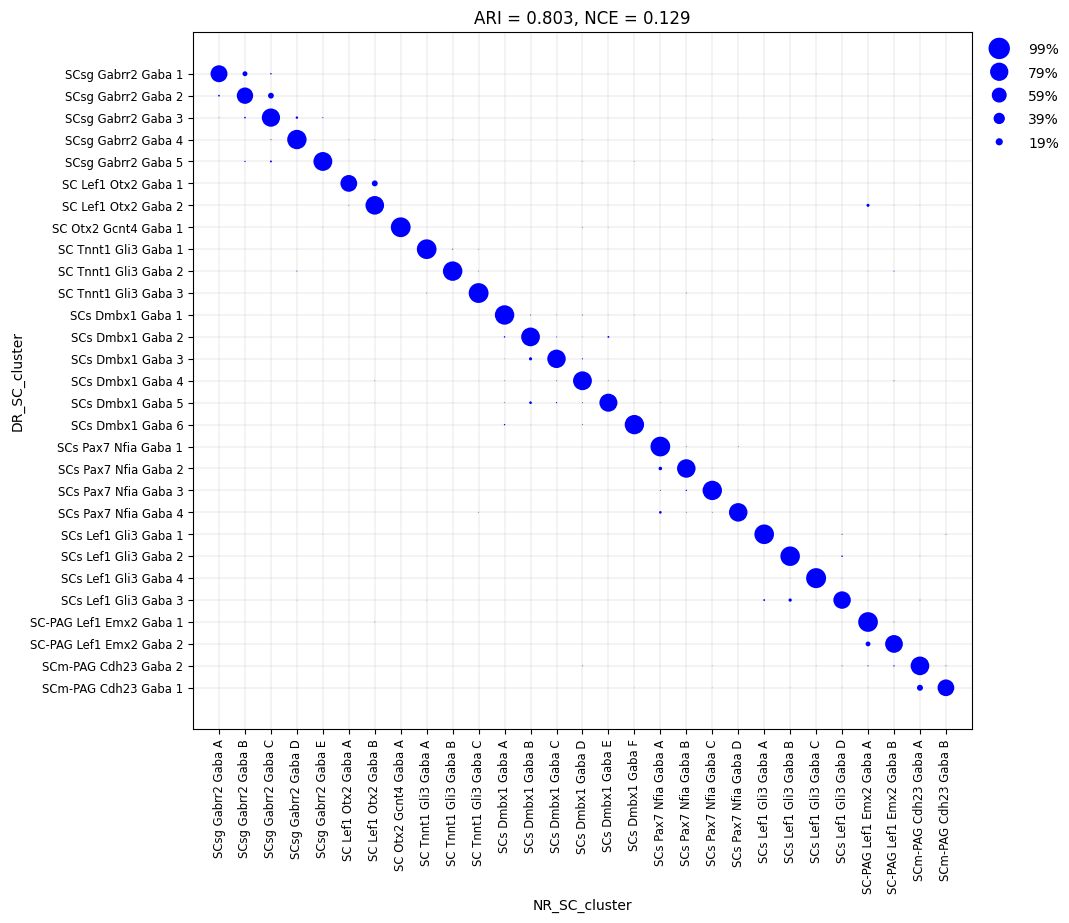

In [35]:

def calculateNCE(labels_true,labels_pred):
    X = labels_true
    Y = labels_pred
    contTable = confusion_matrix(X,Y)[0:len(np.unique(X)), 0:len(np.unique(Y))]
    a = np.sum(contTable, axis = 1)
    b = np.sum(contTable, axis = 0)
    N = np.sum(contTable)
    pij = contTable/N
    pi = a/N
    pj = b/N
    Hyx = np.zeros(contTable.shape)
    for i in range(contTable.shape[0]):
        for j in range(contTable.shape[1]):
          if pij[i,j] == 0:
            Hyx[i,j] = 0
          else:
            Hyx[i,j] = pij[i,j]*np.log10(pij[i,j]/pi[i])
    CE = -np.sum(Hyx)
    Hyi = np.zeros(contTable.shape[1])
    for j in range(contTable.shape[1]):
      if pj[j] == 0:
       Hyi[j] = 0
      else:
        Hyi[j] = pj[j]*np.log10(pj[j])
    Hy = -np.sum(Hyi)
    NCE = CE/Hy
    return NCE
#Defining class that contains functions that will perform the mapping with XGBoost and plot the results
class TimeMapping():
    # xgbclassifier will run the feature selection, training and validation, and testing
    def xgbclassifier(
            self,
            train_anndata,
            test_anndata,
            train_dict,
            test_dict,
            max_cells_per_ident=700,
            train_frac=0.7
    ):

        self.train_dict = train_dict
        self.test_dict = test_dict

        self.numbertrainclasses = len(train_anndata.obs.cluster.values.categories)
        self.numbertestclasses = len(test_anndata.obs.cluster.values.categories)

        # Splitting the cell barcodes into a training set and validation set based on the minimum of 70% of cells or 700 cells
        # Creating array of the labels for each cell (the cluster each cell barcode belongs too)
        training_set_train = []
        training_label_train = []

        for i in train_anndata.obs.cluster.values.categories.values:
            cells_in_clust = train_anndata.obs.index[train_anndata.obs.cluster.values == i]
            n = min(max_cells_per_ident, round(len(cells_in_clust) * train_frac))
            train_temp = np.random.choice(cells_in_clust, n, replace=False)
            if len(train_temp) < 100:
                train_temp_bootstrap = np.random.choice(train_temp, size=100 - int(len(train_temp)))
                train_temp = np.hstack([train_temp_bootstrap, train_temp])
            training_set_train = np.hstack([training_set_train, train_temp])
            training_label_train = np.hstack([training_label_train, np.repeat(train_dict[i], len(train_temp))])

        training_set_test = []
        training_label_test = []
        for i in test_anndata.obs.cluster.values.categories.values:
            cells_in_clust = test_anndata.obs.index[test_anndata.obs.cluster.values == i]
            n = min(max_cells_per_ident, round(len(cells_in_clust) * train_frac))
            train_temp = np.random.choice(cells_in_clust, n, replace=False)
            if len(train_temp) < 100:
                train_temp_bootstrap = np.random.choice(train_temp, size=100 - int(len(train_temp)))
                train_temp = np.hstack([train_temp_bootstrap, train_temp])
            training_set_test = np.hstack([training_set_test, train_temp])
            training_label_test = np.hstack([training_label_test, np.repeat(test_dict[i], len(train_temp))])

        train_index_train = []
        for i in training_set_train:
            train_index_train.append(np.where(train_anndata.obs.index.values == i)[0][0])

        train_index_test = []
        for i in training_set_test:
            train_index_test.append(np.where(test_anndata.obs.index.values == i)[0][0])

        train_matrix_train = xgb.DMatrix(data=train_anndata.X[train_index_train, :], label=training_label_train,
                                         feature_names=list(train_anndata.var.index.values))

        train_matrix_test = xgb.DMatrix(data=test_anndata.X[train_index_test, :], label=training_label_test,
                                        feature_names=list(test_anndata.var.index.values))

        del training_set_train, training_label_train, training_set_test, training_label_test, train_index_train, train_index_test

        # Defining parameters for the XGBoost Model
        xgb_params_train = {
            'objective': 'multi:softprob',
            'eval_metric': 'mlogloss',
            'num_class': self.numbertrainclasses,
            'eta': 0.2,
            'max_depth': 6,
            'subsample': 0.6}
        nround = 200

        # Fitting the XGBoost Model to the training data
        bst_model_train = xgb.train(
            params=xgb_params_train,
            dtrain=train_matrix_train,
            num_boost_round=nround)

        xgb_params_test = {
            'objective': 'multi:softprob',
            'eval_metric': 'mlogloss',
            'num_class': self.numbertestclasses,
            'eta': 0.2,
            'max_depth': 6,
            'subsample': 0.6}
        nround = 200

        # Fitting the XGBoost Model to the testing data
        bst_model_test = xgb.train(
            params=xgb_params_test,
            dtrain=train_matrix_test,
            num_boost_round=nround)
        train_xgboost_scores = bst_model_train.get_score(importance_type="gain")
        sort_train_scores = {k: v for k, v in
                             sorted(train_xgboost_scores.items(), key=lambda item: item[1], reverse=True)[:500]}
        top500genestrain = list(sort_train_scores.keys())

        test_xgboost_scores = bst_model_test.get_score(importance_type="gain")
        sort_test_scores = {k: v for k, v in
                            sorted(test_xgboost_scores.items(), key=lambda item: item[1], reverse=True)[:500]}
        top500genestest = list(sort_test_scores.keys())

        common_top_genes = np.array([i for i in top500genestrain if
                                     i in top500genestest])  # These are the features that we will use for training, validating and testing

        del train_matrix_train, train_matrix_test, bst_model_train, bst_model_test, train_xgboost_scores, sort_train_scores, top500genestrain, test_xgboost_scores, sort_test_scores, top500genestest

        # Train XGBoost on 70% of training data and validate on the remaining data
        common_top_genes_index_train = []
        for i in common_top_genes:
            common_top_genes_index_train.append(np.where(train_anndata.var.index.values == i)[0][0])

        training_set_train_70 = []
        validation_set_train_70 = []
        training_label_train_70 = []
        validation_label_train_70 = []

        for i in train_anndata.obs.cluster.values.categories.values:
            cells_in_clust = train_anndata.obs.index[train_anndata.obs.cluster.values == i]
            n = min(max_cells_per_ident, round(len(cells_in_clust) * train_frac))
            train_temp = np.random.choice(cells_in_clust, n, replace=False)
            validation_temp = np.setdiff1d(cells_in_clust, train_temp)
            if len(train_temp) < 100:
                train_temp_bootstrap = np.random.choice(train_temp, size=100 - int(len(train_temp)))
                train_temp = np.hstack([train_temp_bootstrap, train_temp])
            training_set_train_70 = np.hstack([training_set_train_70, train_temp])
            validation_set_train_70 = np.hstack([validation_set_train_70, validation_temp])
            training_label_train_70 = np.hstack([training_label_train_70, np.repeat(train_dict[i], len(train_temp))])
            validation_label_train_70 = np.hstack(
                [validation_label_train_70, np.repeat(train_dict[i], len(validation_temp))])
        train_index_train_70 = []
        for i in training_set_train_70:
            train_index_train_70.append(np.where(train_anndata.obs.index.values == i)[0][0])
        validation_index_train_70 = []
        for i in validation_set_train_70:
            validation_index_train_70.append(np.where(train_anndata.obs.index.values == i)[0][0])

        train_matrix_train_70 = xgb.DMatrix(
            data=train_anndata.X[:, common_top_genes_index_train][train_index_train_70, :],
            label=training_label_train_70)
        validation_matrix_train_70 = xgb.DMatrix(
            data=train_anndata.X[:, common_top_genes_index_train][validation_index_train_70, :],
            label=validation_label_train_70)

        del training_set_train_70, validation_set_train_70, training_label_train_70, train_index_train_70, validation_index_train_70

        bst_model_train_70 = xgb.train(
            params=xgb_params_train,
            dtrain=train_matrix_train_70,
            num_boost_round=nround)

        validation_pred_train_70 = bst_model_train_70.predict(data=validation_matrix_train_70)

        valid_predlabels_train_70 = np.zeros((validation_pred_train_70.shape[0]))
        for i in range(validation_pred_train_70.shape[0]):
            valid_predlabels_train_70[i] = np.argmax(validation_pred_train_70[i, :])

        del train_matrix_train_70, validation_matrix_train_70, validation_pred_train_70

        # Train XGBoost on the full training data
        training_set_train_full = []
        training_label_train_full = []

        for i in train_anndata.obs.cluster.values.categories.values:
            train_temp = train_anndata.obs.index[train_anndata.obs.cluster.values == i]
            if len(train_temp) < 100:
                train_temp_bootstrap = np.random.choice(train_temp, size=100 - int(len(train_temp)))
                train_temp = np.hstack([train_temp_bootstrap, train_temp])
            training_set_train_full = np.hstack([training_set_train_full, train_temp])
            training_label_train_full = np.hstack(
                [training_label_train_full, np.repeat(train_dict[i], len(train_temp))])

        train_index_full = []
        for i in training_set_train_full:
            train_index_full.append(np.where(train_anndata.obs.index.values == i)[0][0])

        full_training_data = xgb.DMatrix(
            data=train_anndata.X[:, common_top_genes_index_train][train_index_full, :],
            label=training_label_train_full)
        del common_top_genes_index_train, training_set_train_full, training_label_train_full, train_index_full

        bst_model_full_train = xgb.train(
            params=xgb_params_train,
            dtrain=full_training_data,
            num_boost_round=nround)

        # Predict the testing cluster labels
        common_top_genes_index_test = []
        for i in common_top_genes:
            common_top_genes_index_test.append(np.where(test_anndata.var.index.values == i)[0][0])

        full_testing_data = xgb.DMatrix(data=test_anndata.X[:, common_top_genes_index_test])
        test_prediction = bst_model_full_train.predict(data=full_testing_data)

        del bst_model_full_train, full_testing_data

        test_predlabels = np.zeros((test_prediction.shape[0]))
        for i in range(test_prediction.shape[0]):
            if np.max(test_prediction[i, :]) > 1.1 * (1 / self.numbertrainclasses):
                test_predlabels[i] = np.argmax(test_prediction[i, :])
            else:
                test_predlabels[i] = self.numbertrainclasses

        test_labels = np.zeros(len(test_anndata.obs.cluster.values))
        for i, l in enumerate(test_anndata.obs.cluster.values):
            test_labels[i] = test_dict[l]

        return validation_label_train_70, valid_predlabels_train_70, test_labels, test_predlabels
    #plotConfusionMatrix will take the results from the xgboost classifier and plot them
    def plotConfusionMatrix(
        self,
        ytrue,
        ypred,
        type,
        save_as,
        title = '',
        xaxislabel = '',
        yaxislabel = ''
        ):

        confusionmatrix = confusion_matrix(y_true = ytrue, y_pred = ypred)
        if type == 'mapping':
          if self.numbertrainclasses in ypred:
            confusionmatrix = confusionmatrix[0:self.numbertestclasses,0:self.numbertrainclasses+1]
          else:
            confusionmatrix = confusionmatrix[0:self.numbertestclasses,0:self.numbertrainclasses]
        confmatpercent = np.zeros(confusionmatrix.shape)
        for i in range(confusionmatrix.shape[0]):
          if np.sum(confusionmatrix[i,:]) != 0:
            confmatpercent[i,:] = confusionmatrix[i,:]/np.sum(confusionmatrix[i,:])
          else:
            confmatpercent[i,:] = confusionmatrix[i,:]
        diagcm = confmatpercent
        xticks = np.linspace(0, confmatpercent.shape[1]-1, confmatpercent.shape[1], dtype = int)
        xticksactual = []
        for i in xticks:
          if i != self.numbertrainclasses:
            xticksactual.append(list(self.train_dict.keys())[i])
          else:
            xticksactual.append('Unassigned')
        dot_max = np.max(diagcm.flatten())
        dot_min = 0
        if dot_min != 0 or dot_max != 1:
            frac = np.clip(diagcm, dot_min, dot_max)
            old_range = dot_max - dot_min
            frac = (frac - dot_min) / old_range
        else:
            frac = diagcm
        xvalues = []
        yvalues = []
        sizes = []
        for i in range(diagcm.shape[0]):
            for j in range(diagcm.shape[1]):
                xvalues.append(j)
                yvalues.append(i)
                sizes.append((frac[i,j]*35)**1.5)
        size_legend_width = 0.5
        height = diagcm.shape[0] * 0.3 + 1
        height = max([1.5, height])
        heatmap_width = diagcm.shape[1] * 0.35
        width = (
            heatmap_width
            + size_legend_width
            )
        fig = plt.figure(figsize=(width, height))
        axs = gridspec.GridSpec(
            nrows=2,
            ncols=2,
            wspace=0.02,
            hspace=0.04,
            width_ratios=[
                heatmap_width,
                size_legend_width
            ],
            height_ratios=[0.5, 10]
        )
        dot_ax = fig.add_subplot(axs[1, 0])
        dot_ax.scatter(xvalues, yvalues, s=sizes, c='blue', norm=None, edgecolor='none')
        y_ticks = range(diagcm.shape[0])
        dot_ax.set_yticks(y_ticks)
        if type == 'validation':
            dot_ax.set_yticklabels(list(self.train_dict.keys()))
        elif type == 'mapping':
            dot_ax.set_yticklabels(list(self.test_dict.keys()))
        x_ticks = range(diagcm.shape[1])
        dot_ax.set_xticks(x_ticks)
        dot_ax.set_xticklabels(xticksactual, rotation=90)
        dot_ax.tick_params(axis='both', labelsize='small')
        dot_ax.grid(True, linewidth=0.2)
        dot_ax.set_axisbelow(True)
        dot_ax.set_xlim(-0.5, diagcm.shape[1] + 0.5)
        ymin, ymax = dot_ax.get_ylim()
        dot_ax.set_ylim(ymax + 0.5, ymin - 0.5)
        dot_ax.set_xlim(-1, diagcm.shape[1])
        dot_ax.set_xlabel(xaxislabel)
        dot_ax.set_ylabel(yaxislabel)
        dot_ax.set_title(title)
        size_legend_height = min(1.75, height)
        wspace = 10.5 / width
        axs3 = gridspec.GridSpecFromSubplotSpec(
            2,
            1,
            subplot_spec=axs[1, 1],
            wspace=wspace,
            height_ratios=[
                size_legend_height / height,
                (height - size_legend_height) / height
            ]
        )
        diff = dot_max - dot_min
        if 0.3 < diff <= 0.6:
            step = 0.1
        elif diff <= 0.3:
            step = 0.05
        else:
            step = 0.2
        fracs_legends = np.arange(dot_max, dot_min, step * -1)[::-1]
        if dot_min != 0 or dot_max != 1:
            fracs_values = (fracs_legends - dot_min) / old_range
        else:
            fracs_values = fracs_legends
        size = (fracs_values * 35) ** 1.5
        size_legend = fig.add_subplot(axs3[0])
        size_legend.scatter(np.repeat(0, len(size)), range(len(size)), s=size, c='blue')
        size_legend.set_yticks(range(len(size)))
        labels = ["{:.0%}".format(x) for x in fracs_legends]
        if dot_max < 1:
            labels[-1] = ">" + labels[-1]
        size_legend.set_yticklabels(labels)
        size_legend.set_yticklabels(["{:.0%}".format(x) for x in fracs_legends])
        size_legend.tick_params(axis='y', left=False, labelleft=False, labelright=True)
        size_legend.tick_params(axis='x', bottom=False, labelbottom=False)
        size_legend.spines['right'].set_visible(False)
        size_legend.spines['top'].set_visible(False)
        size_legend.spines['left'].set_visible(False)
        size_legend.spines['bottom'].set_visible(False)
        size_legend.grid(False)
        ymin, ymax = size_legend.get_ylim()
        size_legend.set_ylim(ymin, ymax + 0.5)
        fig.savefig(save_as, bbox_inches='tight')

        return diagcm, xticksactual, axs

#N_celltype=sc.read_h5ad('F:/single cell data/SC/N_SC_SCig Foxb1 Glut_filter.h5ad')
#D_celltype=sc.read_h5ad('F:/single cell data/SC/D_SC_SCig Foxb1 Glut_filter.h5ad')

#del N_SC_Gaba.obs['cluster']
#del D_SC_Gaba.obs['cluster']

N_SC_Gaba.obs['cluster']=N_SC_Gaba.obs['cluster_use']
D_SC_Gaba.obs['cluster']=D_SC_Gaba.obs['cluster_use']
N_SC_dict = {'SCsg Gabrr2 Gaba A':0, 'SCsg Gabrr2 Gaba B':1, 'SCsg Gabrr2 Gaba C':2,'SCsg Gabrr2 Gaba D':3, 'SCsg Gabrr2 Gaba E':4,'SC Lef1 Otx2 Gaba A':5,'SC Lef1 Otx2 Gaba B':6,
             'SC Otx2 Gcnt4 Gaba A':7,'SC Tnnt1 Gli3 Gaba A':8,'SC Tnnt1 Gli3 Gaba B':9,'SC Tnnt1 Gli3 Gaba C':10,
             'SCs Dmbx1 Gaba A':11,'SCs Dmbx1 Gaba B':12,'SCs Dmbx1 Gaba C':13,'SCs Dmbx1 Gaba D':14,'SCs Dmbx1 Gaba E':15,'SCs Dmbx1 Gaba F':16,
             'SCs Pax7 Nfia Gaba A':17,'SCs Pax7 Nfia Gaba B':18,'SCs Pax7 Nfia Gaba C':19,'SCs Pax7 Nfia Gaba D':20,
             'SCs Lef1 Gli3 Gaba A':21,'SCs Lef1 Gli3 Gaba B':22,'SCs Lef1 Gli3 Gaba C':23,'SCs Lef1 Gli3 Gaba D':24,
             'SC-PAG Lef1 Emx2 Gaba A':25,'SC-PAG Lef1 Emx2 Gaba B':26,'SCm-PAG Cdh23 Gaba A':27,'SCm-PAG Cdh23 Gaba B':28}

D_SC_dict =  {'SCsg Gabrr2 Gaba 1':0, 'SCsg Gabrr2 Gaba 2':1, 'SCsg Gabrr2 Gaba 3':2,'SCsg Gabrr2 Gaba 4':3, 'SCsg Gabrr2 Gaba 5':4,'SC Lef1 Otx2 Gaba 1':5,'SC Lef1 Otx2 Gaba 2':6,
             'SC Otx2 Gcnt4 Gaba 1':7,'SC Tnnt1 Gli3 Gaba 1':8,'SC Tnnt1 Gli3 Gaba 2':9,'SC Tnnt1 Gli3 Gaba 3':10,
             'SCs Dmbx1 Gaba 1':11,'SCs Dmbx1 Gaba 2':12,'SCs Dmbx1 Gaba 3':13,'SCs Dmbx1 Gaba 4':14,'SCs Dmbx1 Gaba 5':15,'SCs Dmbx1 Gaba 6':16,
             'SCs Pax7 Nfia Gaba 1':17,'SCs Pax7 Nfia Gaba 2':18,'SCs Pax7 Nfia Gaba 3':19,'SCs Pax7 Nfia Gaba 4':20,
             'SCs Lef1 Gli3 Gaba 1':21,'SCs Lef1 Gli3 Gaba 2':22,'SCs Lef1 Gli3 Gaba 4':23,'SCs Lef1 Gli3 Gaba 3':24,
             'SC-PAG Lef1 Emx2 Gaba 1':25,'SC-PAG Lef1 Emx2 Gaba 2':26,'SCm-PAG Cdh23 Gaba 2':27,'SCm-PAG Cdh23 Gaba 1':28}
tm = TimeMapping()
validation_label_train_NRvsDR, valid_predlabels_train_NRvsDR, test_labelsNRvsDR, test_predlabelsNRvsDR = tm.xgbclassifier(
    train_anndata = N_SC_Gaba,
    test_anndata = D_SC_Gaba,
    train_dict = N_SC_dict,
    test_dict = D_SC_dict)
mappingconfmatNRvsDR, mappingxticksNRvsDR, mappingplotNRvsDR = tm.plotConfusionMatrix(
    ytrue=test_labelsNRvsDR,
    ypred=test_predlabelsNRvsDR,
    type='mapping',
     save_as = 'NR&DR_SC_Gaba_cluster_mapping.svg',
     title = 'ARI = {:.3f}, NCE = {:.3f}'.format(adjusted_rand_score(labels_true = test_labelsNRvsDR, labels_pred = test_predlabelsNRvsDR), calculateNCE(labels_true = test_labelsNRvsDR, labels_pred = test_predlabelsNRvsDR)),
    xaxislabel='NR_SC_cluster',
    yaxislabel='DR_SC_cluster')
plt.show()